# Easy Way of Finding and Visualizing Missing Data in Python

explore and visualize the incompleteness of a dataset in Python with missingno library.

***



# Missing Data Basics

As a data science disciple, I need to work more with data, conducting EDA, designing, and developing the model out of it. Data is nothing until you understand it and visualize it most effectively. During the process of exploring and expressing the data, we regularly come across having missing values in the dataset. Many missing values or null values are frequently seen in real-world's datasets. Missing data tends to introduce bias that leads to misleading results so they cannot be ignored. The reason behind missing values can be a variety of factors, including a lack of data, data loss throughout the procedure, and so on.

Missing Value treatment becomes important since the data insights or the performance of your work/model could be impacted if the missing values are not appropriately handled. Thus, we need to understand the way of finding the missing values and treating them before processing them further.


<div class="alert alert-block alert-info">
&#8265; <b>Why focus on missing values:</b> Missing data tends to introduce bias that leads to misleading results.
</div>





#### Dataset: [Palmer Penguins](https://github.com/allisonhorst/palmerpenguins)

The data was collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [Palmer Station, Antarctica, LTER.](https://pal.lternet.edu) 

Dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

__[](https://github.com/allisonhorst/palmerpenguins)__

## Visualization based on the same dataset
Click on image to view the interactive visualization.

__[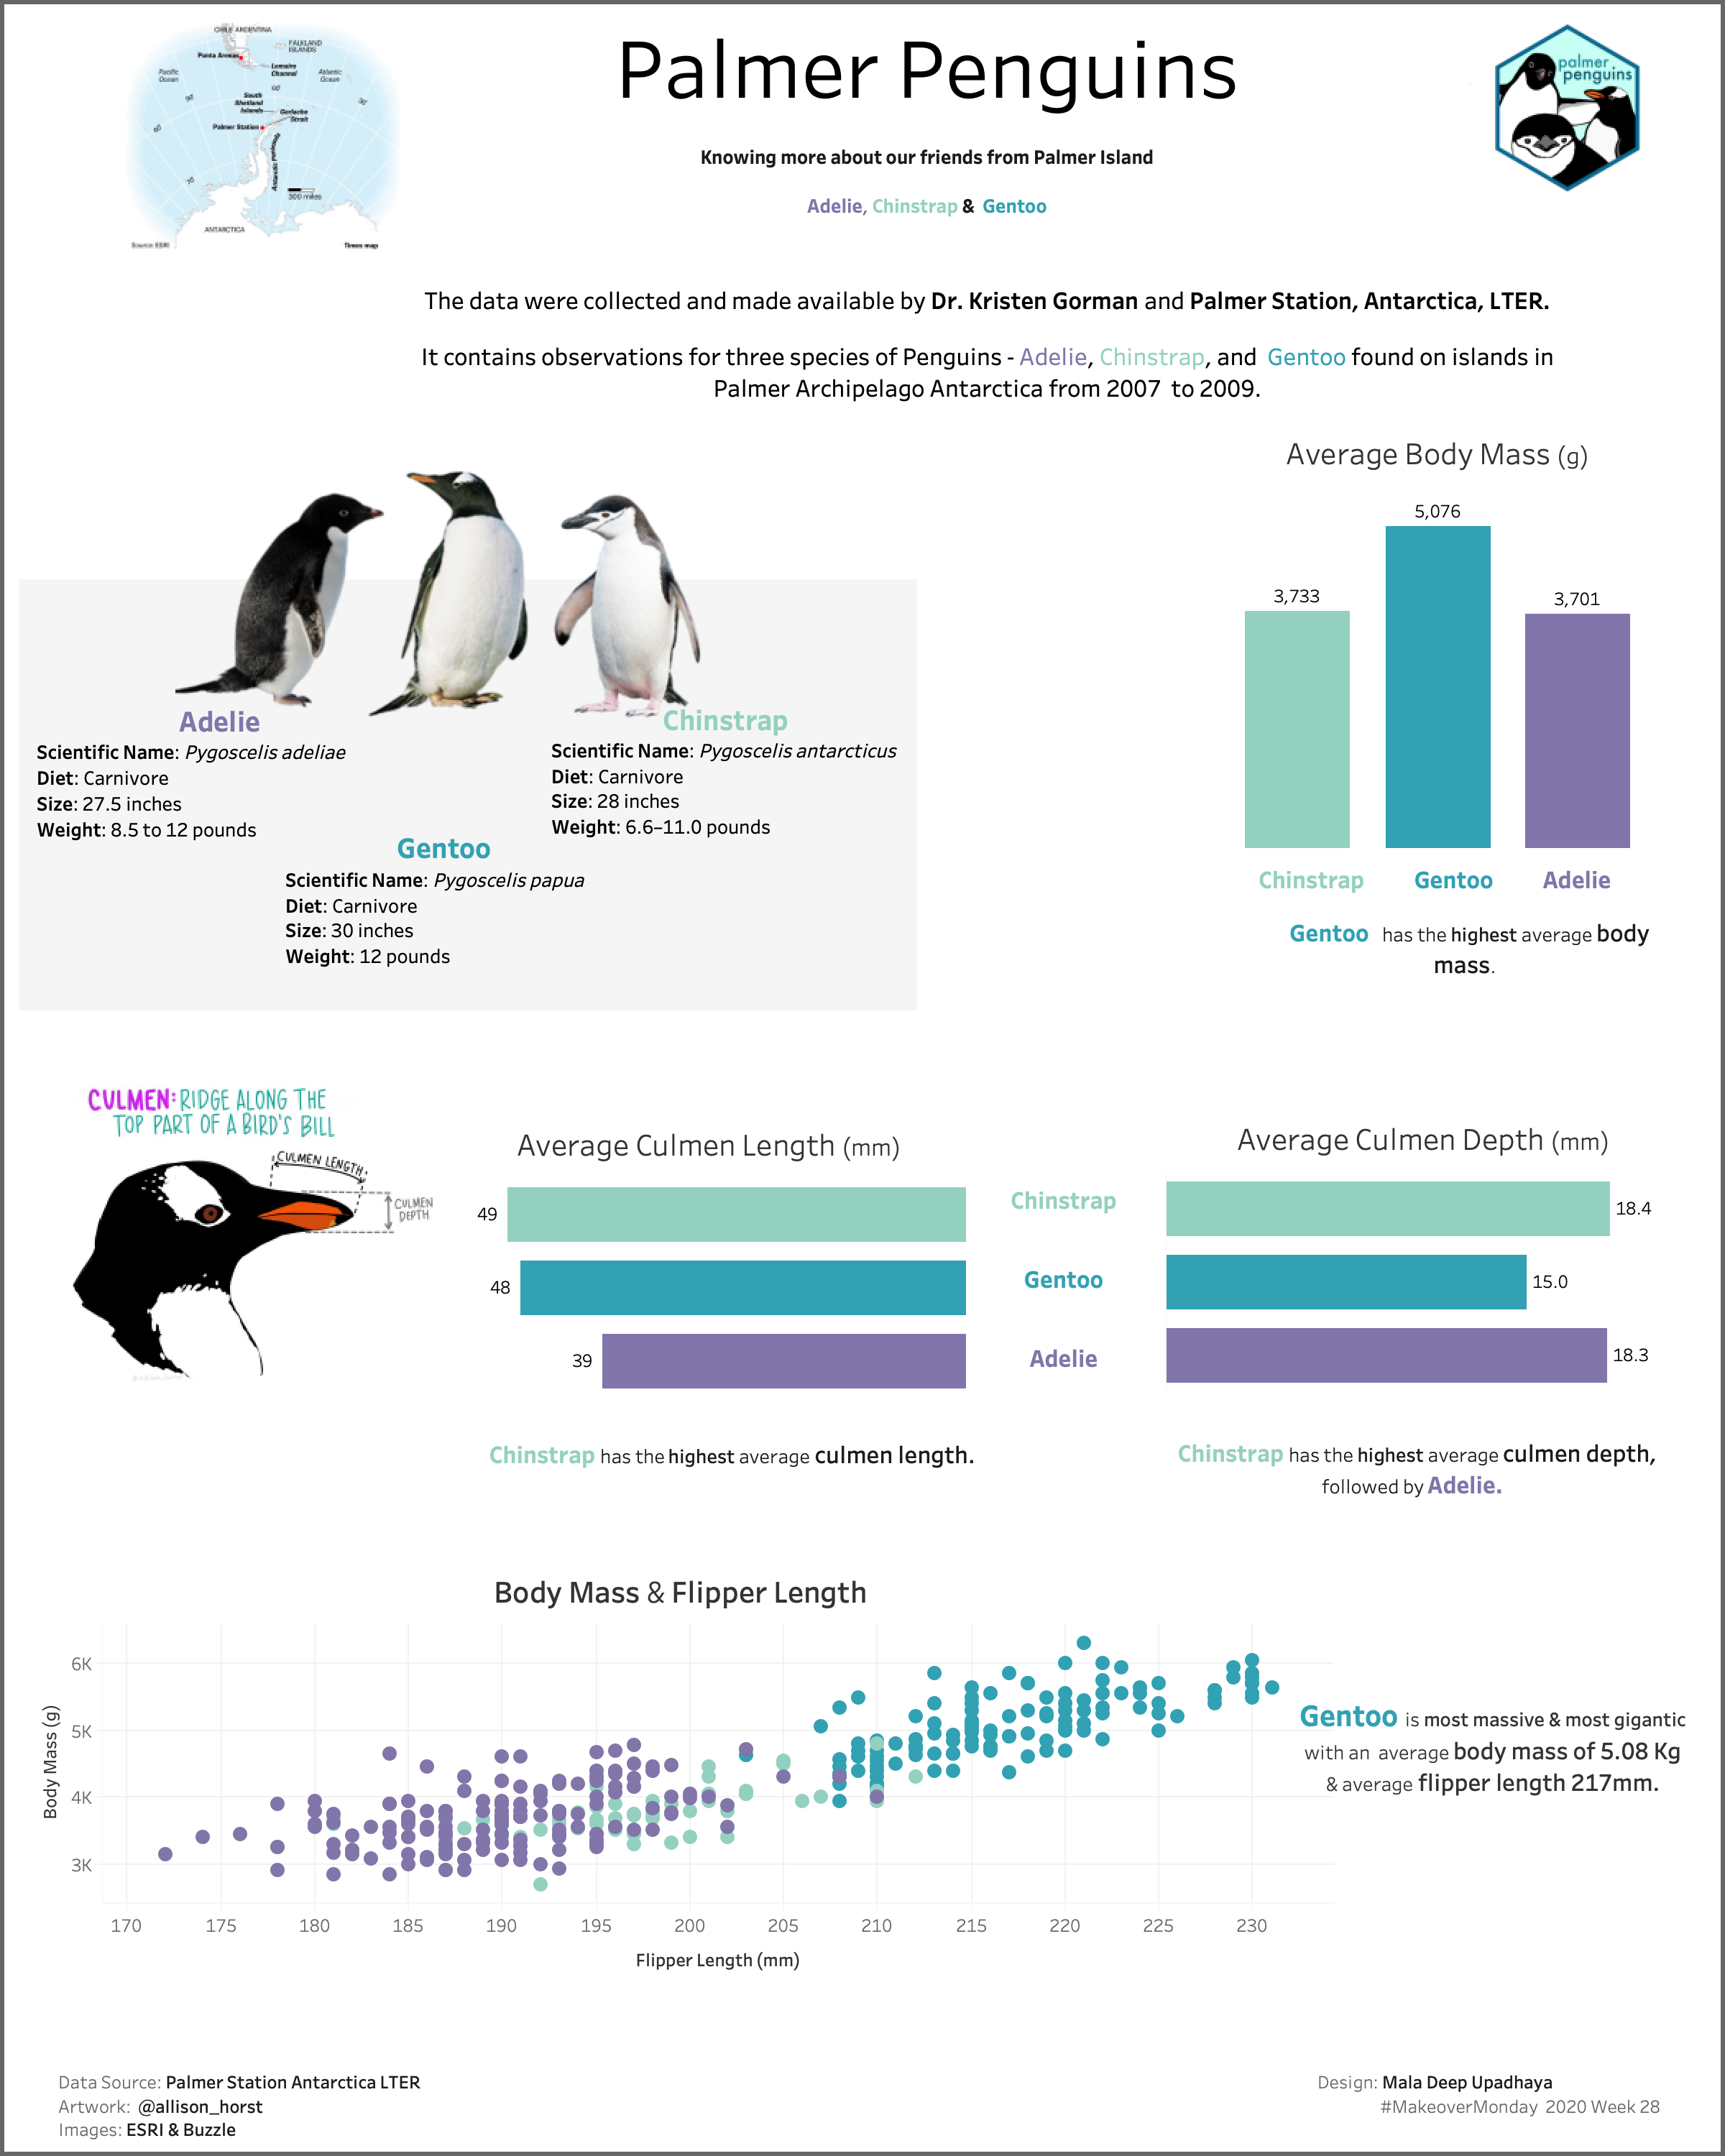](https://public.tableau.com/app/profile/maladeep/viz/Penguin_15948704770880/PalmerPenguins)__

***

# TOC
###### Click each heading to jump to the section


### 1.  [Data loading and exploring](#Data-loading-and-exploring)

### 2. [No missingno way](#No-missingno-way)

###  3. [Checking and working with missing value with wonderful missingno library](#Checking-and-working-with-missing-value-with-wonderful-missingno-library)

### 4. [Bar chart](#Bar-chart)
It displays a count of values present per columns ignoring missing values.

### 5. [Correlation heatmap](#Correlation-heatmap)
Corelation heatmap measures nullity correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.


### 6. [Matrix](#Matrix)
It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

### 7. [Dendrogram](#Dendrogram)
The dendrogram like heatmap groups columns based on nullity relation between them, revealing trends deeper than in the correlation heatmap. It groups columns together where there is more nullity relation.

<div class="alert alert-block alert-info">
<b>After understanding and working with this notebook, you will be able to do:</b> 
    <li> Explore the ways of checking missing values. </li>
<li> Visualize the missing values with bar chart, matrix, heatmap and dendrogram. </li>
</div>


***

# Importing Libraries

In [1]:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno # Our hero ^_^


# Data loading and exploring

In [2]:
# Loading dataset

transaction_df = pd.read_csv('Penguindata.csv')

In [3]:
# Viewing data

transaction_df.head()


studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

   Latitude   Longitude     Island               Stage Individual ID  \
0 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N1A1   
1 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N1A2   
2 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N2A1   
3 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N2A2   
4 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N3A1   

  Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes  11/11/07                39.1               18.7   
1               Yes  11/11/07                39.5               17.4   
2               Yes  11/16/07                40.3               18.0   
3               Yes  11/16/07                 NaN                NaN   
4               Yes  11/16/07                36.7               19.3   

   Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                181.0         3750.0    MALE                NaN   
1                186.0         3800.0  FEMALE            8.94956   
2                195.0         3250.0  FEMALE            8.36821   
3                  NaN            NaN     NaN                NaN   
4                193.0         3450.0  FEMALE            8.76651   

   Delta 13 C (o/oo)                        Comments  
0                NaN  Not enough blood for isotopes.  
1          -24.69454                             NaN  
2          -25.33302                             NaN  
3                NaN              Adult not sampled.  
4          -25.32426                             NaN

# No missingno way 

We will explore and understand the missing or null values of our dataset based on various snippet.

In [4]:
# Checking first 5 data to see any missing values

transaction_df.head(5)


studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

   Latitude   Longitude     Island               Stage Individual ID  \
0 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N1A1   
1 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N1A2   
2 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N2A1   
3 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N2A2   
4 -64.766998    -64.083  Torgersen  Adult, 1 Egg Stage          N3A1   

  Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes  11/11/07                39.1               18.7   
1               Yes  11/11/07                39.5               17.4   
2               Yes  11/16/07                40.3               18.0   
3               Yes  11/16/07                 NaN                NaN   
4               Yes  11/16/07                36.7               19.3   

   Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                181.0         3750.0    MALE                NaN   
1                186.0         3800.0  FEMALE            8.94956   
2                195.0         3250.0  FEMALE            8.36821   
3                  NaN            NaN     NaN                NaN   
4                193.0         3450.0  FEMALE            8.76651   

   Delta 13 C (o/oo)                        Comments  
0                NaN  Not enough blood for isotopes.  
1          -24.69454                             NaN  
2          -25.33302                             NaN  
3                NaN              Adult not sampled.  
4          -25.32426                             NaN

In [5]:
# Checking random 10 data to see any missing values

transaction_df.sample(10)

studyName  Sample Number                                    Species  \
231   PAL0708             12          Gentoo penguin (Pygoscelis papua)   
326   PAL0910            107          Gentoo penguin (Pygoscelis papua)   
343   PAL0910            124          Gentoo penguin (Pygoscelis papua)   
76    PAL0809             77        Adelie Penguin (Pygoscelis adeliae)   
56    PAL0809             57        Adelie Penguin (Pygoscelis adeliae)   
311   PAL0910             92          Gentoo penguin (Pygoscelis papua)   
16    PAL0708             17        Adelie Penguin (Pygoscelis adeliae)   
143   PAL0910            144        Adelie Penguin (Pygoscelis adeliae)   
158   PAL0708              7  Chinstrap penguin (Pygoscelis antarctica)   
218   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   

     Region  Latitude   Longitude     Island               Stage  \
231  Anvers -64.800003 -63.833328     Biscoe  Adult, 1 Egg Stage   
326  Anvers -64.800003 -63.833328     Biscoe  Adult, 1 Egg Stage   
343  Anvers -64.800003 -63.833328     Biscoe  Adult, 1 Egg Stage   
76   Anvers -64.766998 -64.083000  Torgersen  Adult, 1 Egg Stage   
56   Anvers -64.800003 -63.833328     Biscoe  Adult, 1 Egg Stage   
311  Anvers -64.800003 -63.833328     Biscoe  Adult, 1 Egg Stage   
16   Anvers -64.766998 -64.083000  Torgersen  Adult, 1 Egg Stage   
143  Anvers -64.733002 -64.233002      Dream  Adult, 1 Egg Stage   
158  Anvers -64.733002 -64.233002      Dream  Adult, 1 Egg Stage   
218  Anvers -64.733002 -64.233002      Dream  Adult, 1 Egg Stage   

    Individual ID Clutch Completion  Date Egg  Culmen Length (mm)  \
231         N36A2                No  11/27/07                49.0   
326         N28A1               Yes  11/10/09                41.7   
343         N43A2               Yes  11/22/09                49.9   
76          N37A1               Yes   11/6/08                40.9   
56          N24A1               Yes  11/15/08                39.0   
311         N15A2               Yes  11/25/09                52.2   
16           N9A1               Yes  11/12/07                38.7   
143         N81A2               Yes  11/16/09                40.7   
158         N66A1               Yes  11/28/07                46.1   
218        N100A1               Yes  11/21/09                50.8   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  \
231               16.1                216.0         5550.0    MALE   
326               14.7                210.0         4700.0  FEMALE   
343               16.1                213.0         5400.0    MALE   
76                16.8                191.0         3700.0  FEMALE   
56                17.5                186.0         3550.0  FEMALE   
311               17.1                228.0         5400.0    MALE   
16                19.0                195.0         3450.0  FEMALE   
143               17.0                190.0         3725.0    MALE   
158               18.2                178.0         3250.0  FEMALE   
218               19.0                210.0         4100.0    MALE   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
231            8.10417          -25.50562   
326            8.12311          -26.44815   
343            8.36390          -26.15531   
76             8.47257          -26.02002   
56             8.57199          -26.07188   
311            8.36701          -25.89834   
16             9.18528          -25.06691   
143            9.05674          -25.79529   
158            8.85664          -24.55644   
218            9.98044          -24.68741   

                                  Comments  
231  Nest never observed with full clutch.  
326                                    NaN  
343                                    NaN  
76                                     NaN  
56                                     NaN  
311                                    NaN  
16                                     NaN  
143                                    NaN

In [7]:
#  check is there any missing values in dataframe as a whole

transaction_df.isnull()

studyName  Sample Number  Species  Region  Latitude   Longitude  Island  \
0        False          False    False   False      False      False   False   
1        False          False    False   False      False      False   False   
2        False          False    False   False      False      False   False   
3        False          False    False   False      False      False   False   
4        False          False    False   False      False      False   False   
..         ...            ...      ...     ...        ...        ...     ...   
339      False          False    False   False      False      False   False   
340      False          False    False   False      False      False   False   
341      False          False    False   False      False      False   False   
342      False          False    False   False      False      False   False   
343      False          False    False   False      False      False   False   

     Stage  Individual ID  Clutch Completion  Date Egg  Culmen Length (mm)  \
0    False          False              False     False               False   
1    False          False              False     False               False   
2    False          False              False     False               False   
3    False          False              False     False                True   
4    False          False              False     False               False   
..     ...            ...                ...       ...                 ...   
339  False          False              False     False                True   
340  False          False              False     False               False   
341  False          False              False     False               False   
342  False          False              False     False               False   
343  False          False              False     False               False   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)    Sex  \
0                False                False          False  False   
1                False                False          False  False   
2                False                False          False  False   
3                 True                 True           True   True   
4                False                False          False  False   
..                 ...                  ...            ...    ...   
339               True                 True           True   True   
340              False                False          False  False   
341              False                False          False  False   
342              False                False          False  False   
343              False                False          False  False   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  Comments  
0                 True               True     False  
1                False              False      True  
2                False              False      True  
3                 True               True     False  
4                False              False      True  
..                 ...                ...       ...  
339               True               True     False  
340              False              False      True  
341              False              False      True  
342              False              False      True  
343              False              False      True  

[344 rows x 19 columns]

In [8]:
# Check is there any missing values across each column

transaction_df.isnull().any()

studyName              False
Sample Number          False
Species                False
Region                 False
Latitude               False
Longitude              False
Island                 False
Stage                  False
Individual ID          False
Clutch Completion      False
Date Egg               False
Culmen Length (mm)      True
Culmen Depth (mm)       True
Flipper Length (mm)     True
Body Mass (g)           True
Sex                     True
Delta 15 N (o/oo)       True
Delta 13 C (o/oo)       True
Comments                True
dtype: bool

Here from *Culmen Length (mm),* we see True, which indicates that we have some missing values.

In [9]:
# Next way: Print the columns with missing values

[col for col in transaction_df.columns if transaction_df[col].isnull().any()]

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)',
 'Comments']

In [10]:
# Count of missing values of each column

transaction_df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Latitude                 0
Longitude                0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [16]:
# Count missing values in the dataset

print(transaction_df.isnull().values.sum())


335


In [11]:
### get count of missing values of a particular column by group i.e., count of missing values of ‚ÄúCulmen Length (mm)‚Äù column by group (‚ÄúSpecies‚Äù)

transaction_df.groupby(['Species'])['Culmen Length (mm)'].apply(lambda x: x.isnull().sum())

Species
Adelie Penguin (Pygoscelis adeliae)          1
Chinstrap penguin (Pygoscelis antarctica)    0
Gentoo penguin (Pygoscelis papua)            1
Name: Culmen Length (mm), dtype: int64

***

So, till now we did wrote long and little tedious code, now we will harness the power of wonderful missingno library.

# Checking and working with missing value with wonderful missingno library




**Brief Intro:** The Missingno is the Python library compatible with pandas and has a really excellent visualization of the distribution of NaN values. This library is built on matplotlib thus any graphs it produces will be static. 
 



<div class="alert alert-block alert-success">
<b><a href="https://libraries.io/pypi/missingno" target=_blank> Click to read more about missingno library. </a></b> 
   
</div>


Using Missingno library, we can depict missing values in many ways. here we will be generating:
* Bar Chart
* Heatmap
* Matrix
* Dendrogram


## Bar chart

Bar chart displays a count of values present per columns ignoring missing values.

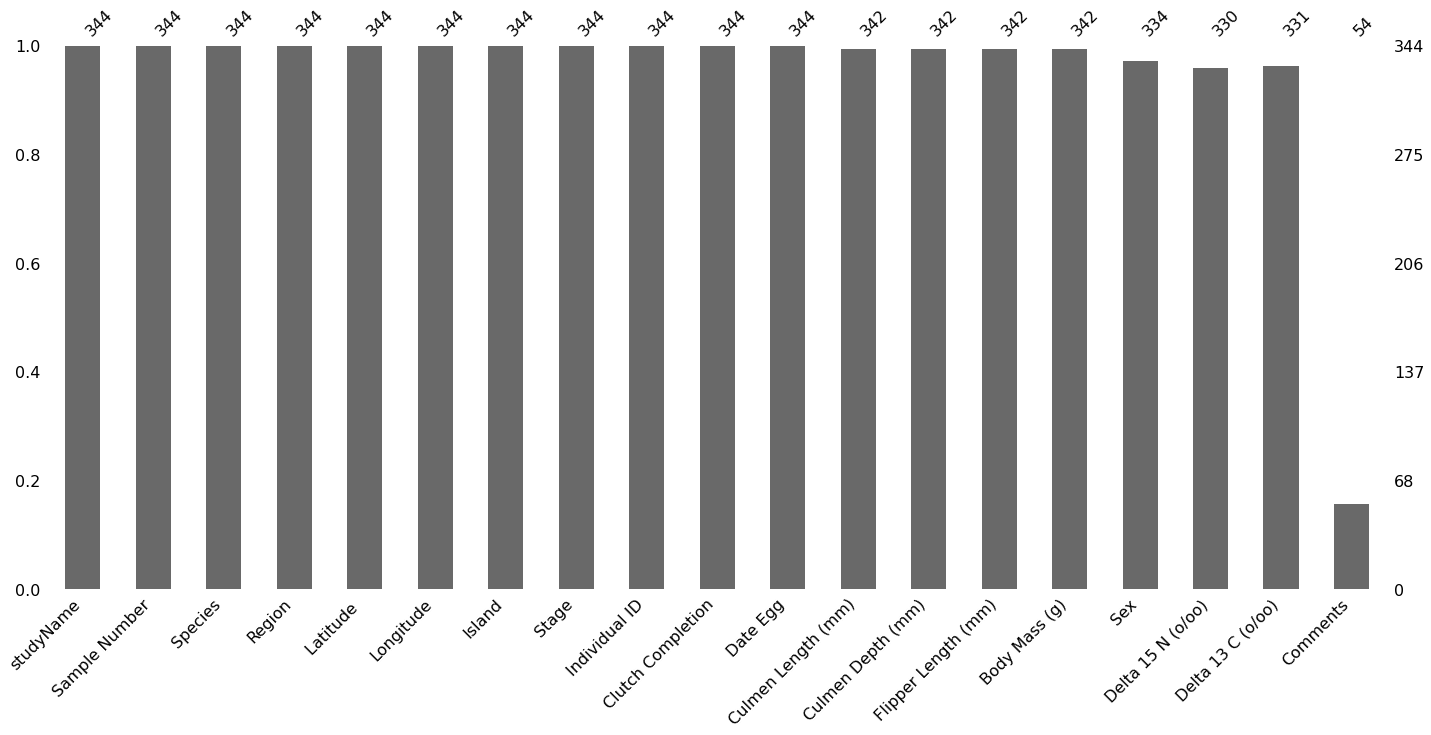

In [12]:
msno.bar(transaction_df)

Here, we see that in each column we need to have 344 data,  but in columns *Culmen Length (mm), Culmen Depth (mm),
 Flipper Length (mm),
 Body Mass (g),
 Sex,
 Delta 15 N (o/oo),
 Delta 13 C (o/oo),
 Comments*, we have some missing values.
 


<div class="alert alert-block alert-warning">
   &#9755; <b>Double Check: </b> Inspecting missing values using <b> isnull() </b> and <b>missingno</b> function gave the same result.
</div>



***

# Correlation heatmap


Correlation heatmap measures nullity correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.


<div class="alert alert-block alert-success">
 &#9755; <b><a href="https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec" target=_blank> How to interepate correlation Heatmap. </a></b> 
    
    
&#9755; <b><a href="https://medium.com/analytics-vidhya/correlation-causation-977f71bb1e36" target=_blank> Understanding correlation and causation. </a></b> 
 
   
</div>

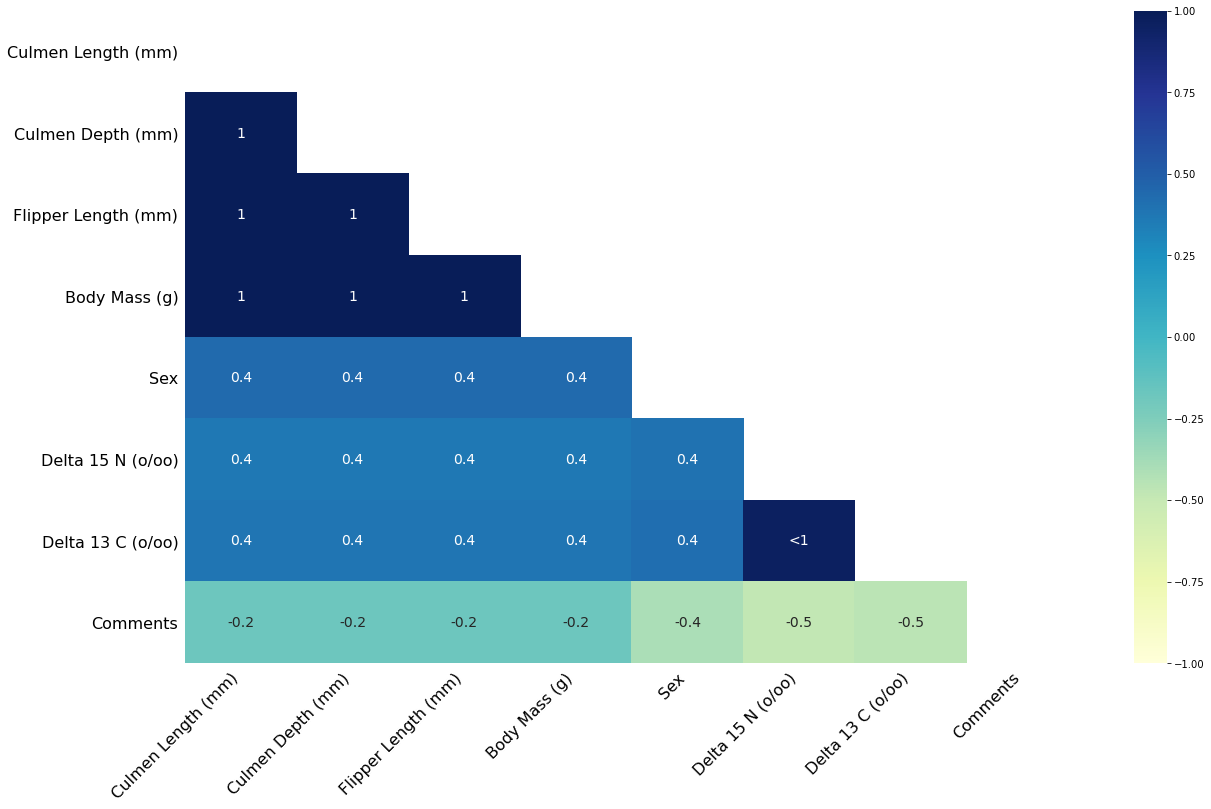

In [13]:
msno.heatmap(transaction_df, cmap='YlGnBu')


**Nullity correlation ranges from(-1 to 1):**

* if one variable appears the other definitely does not: -1 (AKA: strong negative correlation, or a yellow color)
* variables appearing or not appearing have no effect on one another: 0 
* if one variable appears the other definitely also does:  1 (AKA: strong positive correlation, or a blue color)

Variables that are always full or always empty have no meaningful correlation, thus the are  removed from the visualization.


One thing to notice is that values marked <1 or >-1 have a correlation that is almost exactingly negative or positive, but is still not quite good. 

We can see that *Comments* with *Sex* and *Culmen Length (mm)* have low nullity correlation, whereas *Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* are both 1, indicating that, contrary to our expectations, there are a few records that have one but not the other, and such cases require special attention.


> The heatmap is helpful for identifying data completeness correlations between variable pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.




***
## Matrix

It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.


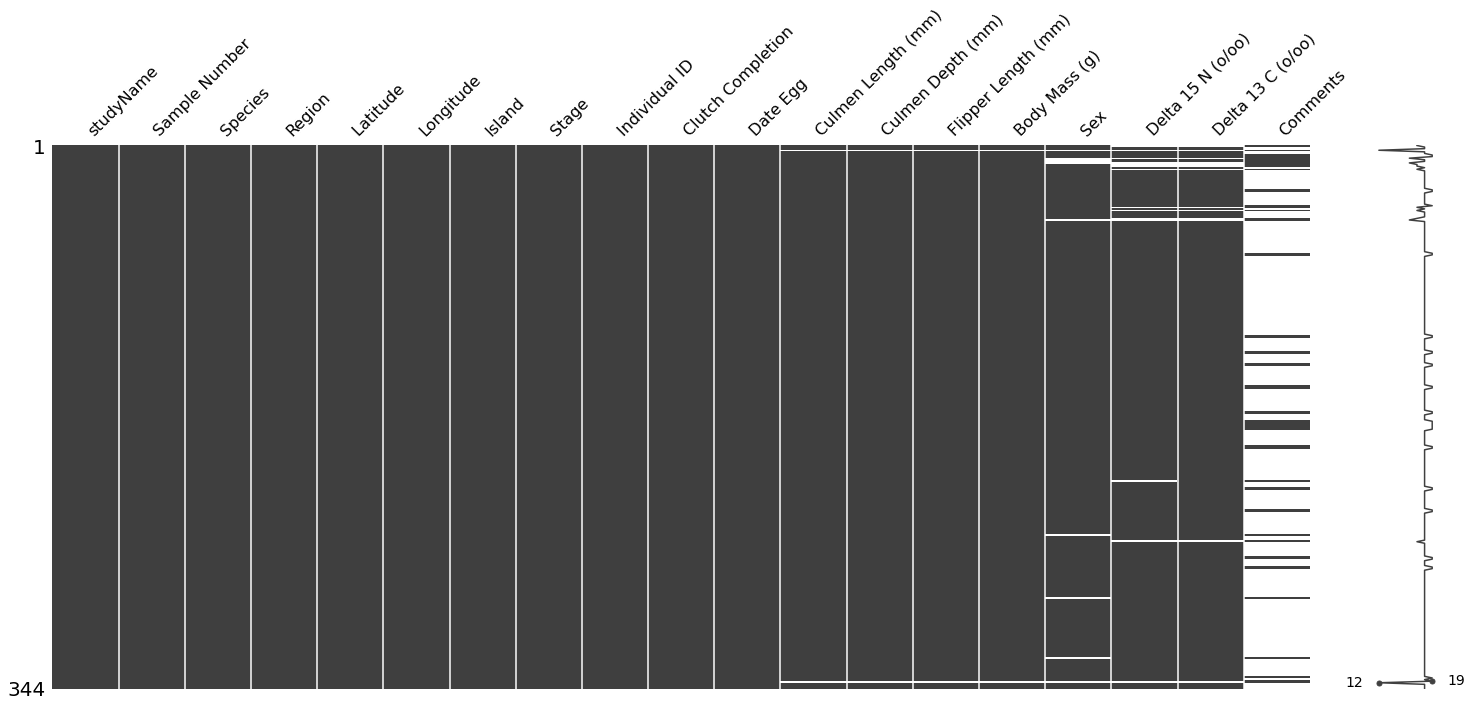

In [14]:
msno.matrix(transaction_df)

Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), are completed but uneven, so we say it has null values. In *Comments,* we see little black lines thus we see it has many null values.

The sparkline (or in some cases striped line) to the right illustrates the overall shape of the data completeness and highlights the rows in the dataset with the **highest of 19 and lowest nullity of 12.**

Lower left corner values give the overall row/data (344) of the dataset.


> Matrix supports up to 50 labeled columns while when working with a large number of columns, we can use dendrogram as it simply flips them to a horizontal configuration.

***

# Dendrogram


The dendrogram like heatmap groups columns based on nullity relation between them, revealing trends deeper than in the correlation heatmap. It groups columns  where there is more nullity relation.

In [15]:
msno.dendrogram(transaction_df)

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). 

<div class="alert alert-block alert-success">
 &#9755; <b><a href="http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html" target=_blank>  More about Hierarchical Clustering Algorithm.</a></b> 
    
</div>

We interpret the graph based on a top-down approach. Cluster leaves which linked together at a distance of zero fully predict one another's presence‚Äîone variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. 

Here, the dendrogram put together the variables which are required and therefore present in every record. Here we see that *Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* are grouped which are further grouped with *Sex* and rest from Date Egg to *Sample Number* and so on are highly related to each other in matters of nullity.



> Connections farther from zero represent combinations of variables that are less similar in nullity.



***

Thus, if you made it this far, We can see that with the missingno library we can easily explore and visualizing missing data. From displaying a count of values present per column, measuring nullity correlation between columns of the dataset, exploring the distribution of data across all columns in the whole dataset, and grouping columns together in place of higher nullity relation is made easy.

***

# Extra Readings & Tutorials üîñ

1. [Exploratory Data Analysis for Beginner Using Python with Complete Guide and  Code
](https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec)

2. [Build Your First Data Visualization Web App in Python Using Streamlit](https://towardsdatascience.com/build-your-first-data-visualization-web-app-in-python-using-streamlit-37e4c83a85db)

3. [The Ultimate Guide To SMS: Spam or Ham Detector Using Python(AN APPROACH WITH ARTIFICIAL INTELLIGENCE)](https://towardsdatascience.com/the-ultimate-guide-to-sms-spam-or-ham-detector-aec467aecd85)

4. [Interactive Tools to Explore Palmer Penguins Dataset](https://explore-palmer-penguins.herokuapp.com)

5. [Surprisingly Effective Way To Name Matching In Python: Data Matching, Fuzzy Matching, Data Deduplication](https://towardsdatascience.com/surprisingly-effective-way-to-name-matching-in-python-1a67328e670e)





<div class="alert alert-block alert-warning">
 &#9755; <b><a href="https://www.datacamp.com?tap_a=5644-dce66f&tap_s=1794269-f38532&utm_medium=affiliate&utm_source=maladeepupadhaya" target=_blank>  Learn more about data handling and visualization in Datacamp.</a></b> 
    
</div>

### Click the medium logo to check my other articles that might help you excel in your data science career.


__[](https://medium.com/@maladeep.upadhaya)__